In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Pytorch'
! ls

/content/gdrive/MyDrive/Pytorch
CNN_MNIST.ipynb  data_linear.csv  Torch_Linear_Regression.ipynb


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
# load dữ liệu, chuyển về dạng numpy
data = pd.read_csv('data_linear.csv').values

In [8]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)
y = y.unsqueeze(1)

In [11]:
# Hàm training
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(1, n_epochs + 1):
      y_hat = model(x)
      print(y_hat.shape, y.shape)
      loss = loss_fn(y_hat, y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if epoch % 1 == 0:
              losses.append(loss.item())
              print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return losses

In [12]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=0.00004)

In [13]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2414]], requires_grad=True), Parameter containing:
 tensor([0.6597], requires_grad=True)]

In [14]:
loss = training_loop(
  n_epochs = 10,
  optimizer = optimizer,
  model = linear_model,
  loss_fn = nn.MSELoss(),
  x = x, 
  y = y
)

torch.Size([30, 1]) torch.Size([30, 1])
Epoch 1, Loss 1097857.500000
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 2, Loss 431763.875000
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 3, Loss 169896.453125
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 4, Loss 66946.156250
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 5, Loss 26472.388672
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 6, Loss 10560.584961
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 7, Loss 4305.022461
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 8, Loss 1845.711792
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 9, Loss 878.867737
torch.Size([30, 1]) torch.Size([30, 1])
Epoch 10, Loss 498.760895


Text(0, 0.5, 'loss')

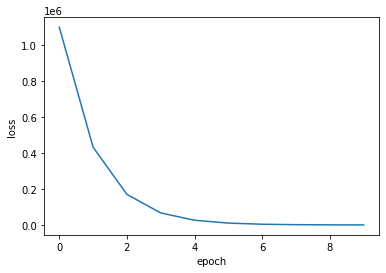

In [15]:
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')

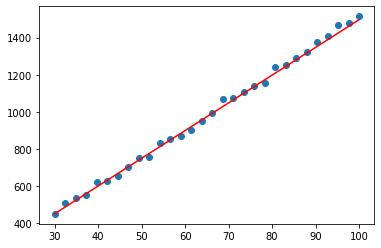

In [16]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)

with torch.no_grad():
    y_hat = linear_model(x)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')